# Assignment Chapter 3 - COMPUTER VISION [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence (AI)` (Batch 7)
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PERSYARATAN` Semua modul (termasuk versi yang sesuai) sudah di-install dengan benar.
<br>`CARA PENGERJAAN` Lengkapi baris kode yang ditandai dengan **#TODO**.
<br>`TARGET PORTFOLIO` Peserta mampu mereplikasi algoritma *image enhancement* yang umumnya digunakan oleh produsen smartphone.
<br>`PERINGATAN` **DILARANG MENGUBAH** kode yang ada di dalam *user-defined function (UDFs)*.

### Deskripsi
Per bulan Juli 2023, Apple dan Samsung memimpin industri ponsel pintar (smartphone) di seluruh dunia, dengan angka gabungan 52,61% dari total pangsa pasar (market share) [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). Sebagai fitur utama yang wajib hadir pada smartphone masa kini, Apple dan Samsung berlomba-lomba menciptakan teknologi kamera agar Anda bisa mengabadikan foto terbaik meski dalam kondisi minim cahaya.
- Pada bulan September 2019, Apple memperkenalkan teknologi **Deep Fusion** (melalui seri iPhone 11) untuk mengatasi tantangan tersebut. Peningkatannya, yang diberi nama **Photonic Engine**, diperkenalkan pada September 2022 melalui seri iPhone 14 terbaru [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- Sementara itu, pada bulan Februari 2023, Samsung memperkenalkan teknologi **Adaptive Tetra-squared Pixel Sensor** dengan seri Samsung S23 terbarunya sebagai solusi lain untuk masalah serupa, menjanjikan hasil foto terang yang luar biasa dari gambar bernuansa gelap [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

Kedua teknologi ini bekerja dengan menggabungkan beberapa piksel yang berdekatan menjadi satu piksel, menggunakan operasi **Max Pooling**. Dalam hal ini, tugas Anda adalah mereplikasi konsep tersebut (mencerahkan foto dengan warna gelap), lalu membandingkan hasilnya dengan pendekatan lain, yaitu **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

### Import libraries

In [ ]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

### User-defined Functions (UDFs)

In [ ]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [ ]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
**JANGAN LUPA** untuk upload file "photo1.jpeg" dan "lena.png" ke Google Colab.

In [ ]:
img = imread("photo1.jpeg")

In [ ]:
lena = cv2.imread("lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

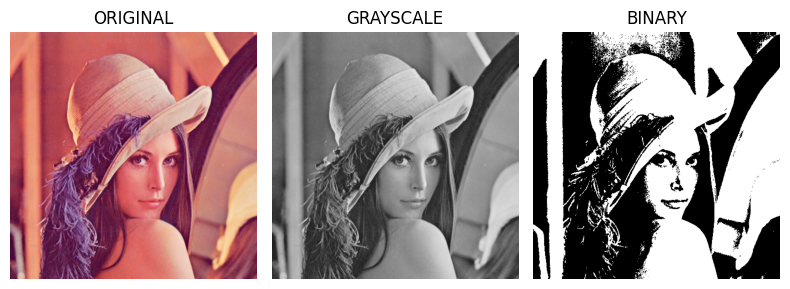

In [ ]:
# original image
img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # TODO: Ubah kanal warna dari BGR ke RGB dengan cv2.COLOR_BGR2RGB

# color image to grayscaled image
img_grayscaled = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # TODO: Ubah kanal warna dari BGR ke grayscale dengan cv2.COLOR_BGR2GRAY
img_grayscaled = cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 127, 255, cv2.THRESH_BINARY) # TODO: Ubah kanal warna dari grayscale ke binary dengan cv2.THRESH_BINARY

# plot both
plot(imgs=[img_lena, img_grayscaled, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, None, "gray"])

* Check their histograms

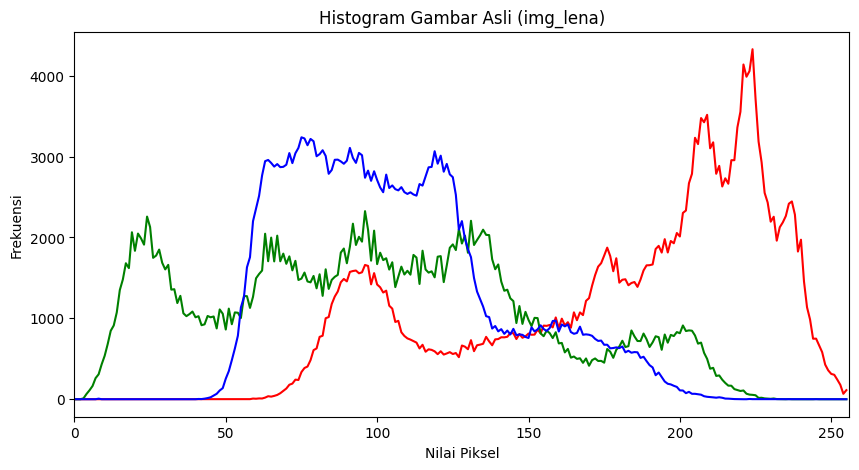

In [ ]:
# TODO: Plot histogram dari gambar asli
plt.figure(figsize=(10, 5))
plt.title("Histogram Gambar Asli (img_lena)")
plt.xlabel("Nilai Piksel")
plt.ylabel("Frekuensi")

# Menghitung dan menampilkan histogram untuk setiap kanal warna (R, G, B)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_lena], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.xlim([0, 256])
plt.show()

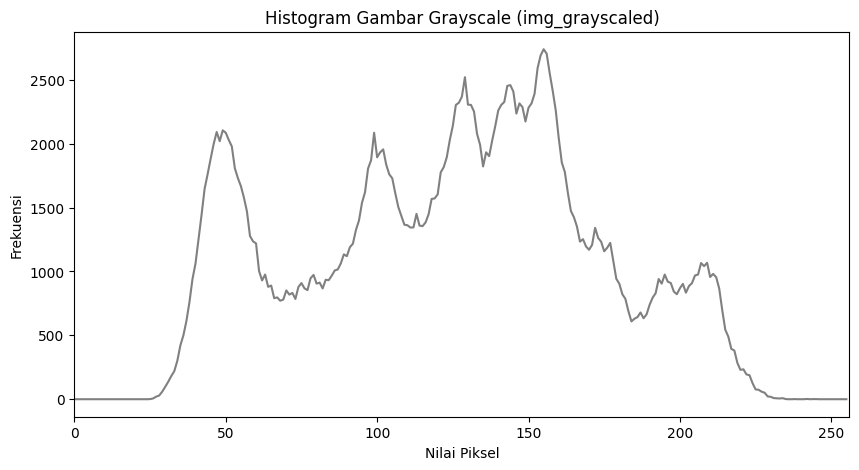

In [ ]:
# TODO: Plot histogram dari gambar grayscale
plt.figure(figsize=(10, 5))
plt.title("Histogram Gambar Grayscale (img_grayscaled)")
plt.xlabel("Nilai Piksel")
plt.ylabel("Frekuensi")

# Menghitung dan menampilkan histogram untuk gambar grayscale
hist = cv2.calcHist([img_grayscaled], [0], None, [256], [0, 256])  # [0] karena grayscale hanya punya 1 channel
plt.plot(hist, color='gray')  # Menampilkan histogram dengan warna abu-abu

plt.xlim([0, 256])
plt.show()

### Max Pooling (using Scikit-image)

In [ ]:
BLOCK_SIZE = (4, 4, 1)

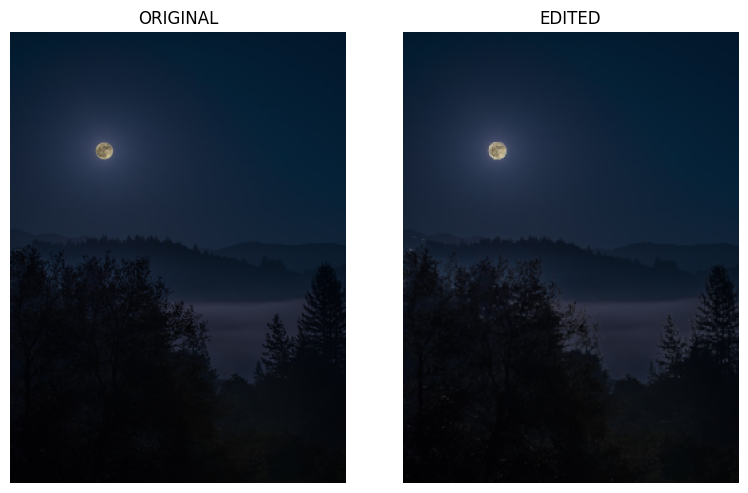

In [ ]:
img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

<ipython-input-11-c192e6f61ca2>:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_torch = from_numpy(img).permute(2, 0, 1).float()


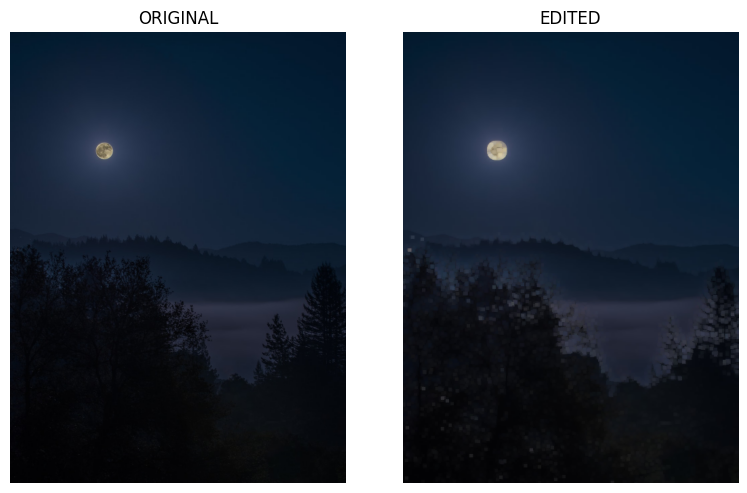

In [ ]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(img).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img, img_torch_edited])

In [ ]:
# PERTANYAAN
# TODO: Apa keunggulan operasi Max Pooling dari PyTorch dibandingkan yang dari Scikit-image?

[ *Max Pooling* di *PyTorch* lebih unggul karena mendukung penggunaan *GPU*, sehingga jauh lebih cepat untuk pem-prosesan gambar berukuran besar dan *deep learning*. *PyTorch* juga terintegrasi langsung dengan model *neural networks* dan mendukung *backpropagation*, memungkinkan *pooling* untuk digunakan saat melatih model. Selain itu, *PyTorch* memudahkan pengolahan gambar dalam **batch** besar secara efisien, dengan berbagai pilihan pengaturan seperti ukuran kernel dan stride. Di sisi lain, *Scikit-image* hanya bekerja di *CPU*, lebih lambat, dan tidak didesain untuk *deep learning* sehingga kurang fleksibel. ]

### Min Pooling and Average Pooling

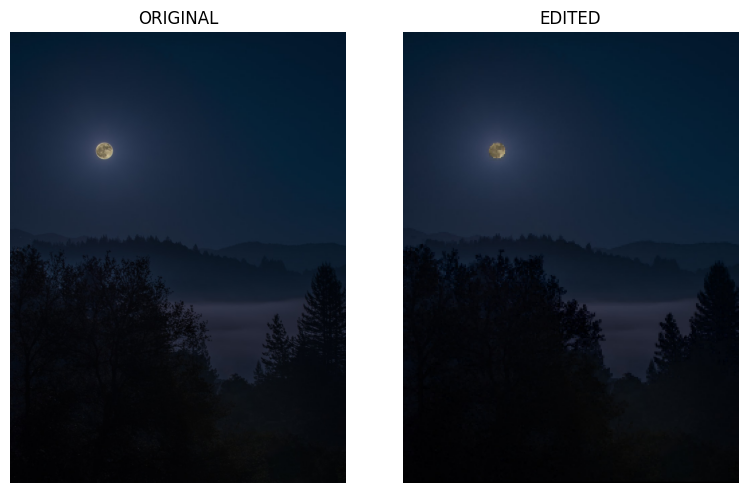

In [ ]:
img_edited_min = block_reduce(img, block_size=BLOCK_SIZE, func=np.min) # TODO: Panggil ulang block_reduce(), tetapi dengan func=np.min
plot(imgs=[img, img_edited_min])

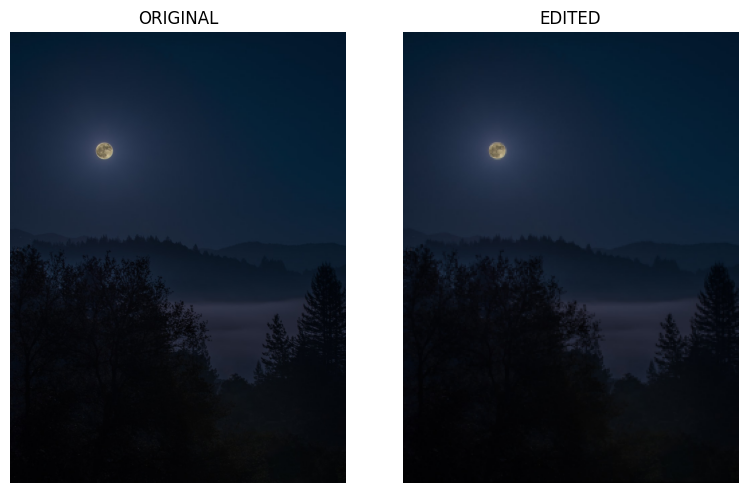

In [ ]:
img_edited_avg = block_reduce(img, block_size=BLOCK_SIZE, func=np.mean).astype(int) # TODO: Panggil ulang block_reduce().astype(int), tetapi dengan func=np.mean
plot(imgs=[img, img_edited_avg])

In [ ]:
# [ PERTANYAAN ]
# TODO: Apa perbedaan antara Min Pooling dan Average Pooling?
# Hint: Apabila perbedaannya tidak terlihat, coba dengan gambar lain atau ubah angka di BLOCK_SIZE.

[ Perbedaan utama antara Min Pooling dan Average Pooling adalah cara penggabungan nilai dalam suatu area. Min Pooling memilih nilai terkecil, sedangkan Average Pooling menghitung rata-rata nilai.  Maka dari itu, Min Pooling lebih sesuai jika ingin menonjolkan fitur berintensitas rendah. Di sisi lain, Average Pooling biasanya mempertahankan lebih banyak informasi dan lebih sering digunakan. ]

### CLAHE
Sekarang, bayangkan Anda memiliki pendekatan baru untuk menyaingi Photonic Engine dari Apple and Adaptive Tetra-squared Pixel dari Samsung dengan menggunakan **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. Bagaimana hasilnya?

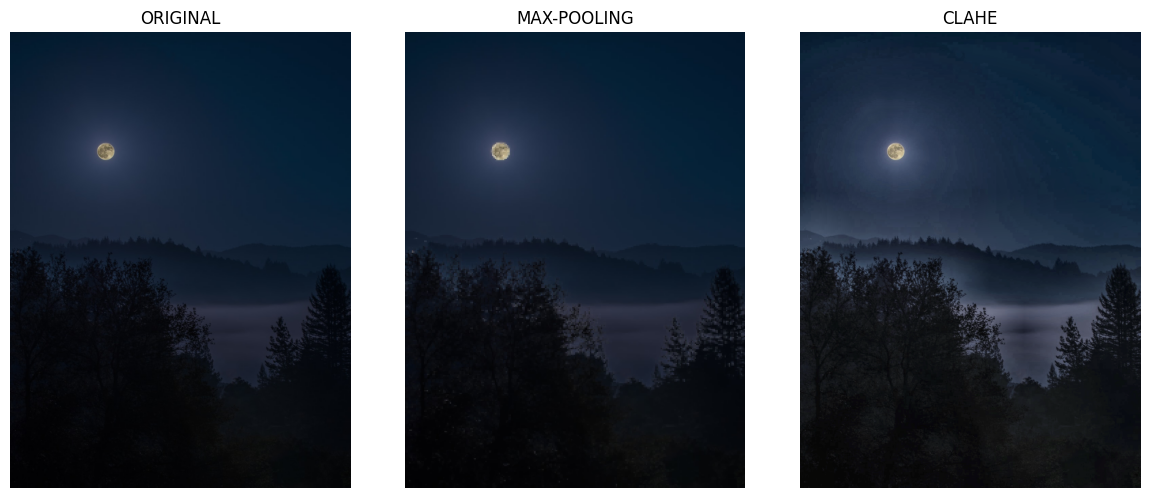

In [ ]:
img_clahe = apply_clahe_rgb(img) # TODO: Panggil fungsi apply_clahe_rgb() dan isi parameter img="photo1.jpeg"
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [ ]:
# [ PERTANYAAN ]
# TODO: Apa keunggulan menggunakan CLAHE (daripada Max Pooling) untuk mencerahkan gambar bernuansa gelap?

[ Menggunakan CLAHE dibandingkan Max Pooling untuk mencerahkan gambar bernuansa gelap memiliki beberapa keunggulan. CLAHE meningkatkan kontras secara adaptif di berbagai area gambar, sehingga detail di area gelap lebih terlihat tanpa membuat area terang menjadi terlalu cerah. Sebaliknya, Max Pooling hanya mengambil nilai tertinggi dalam suatu area, yang sering kali menghilangkan detail halus dan menghasilkan tampilan gambar yang kurang alami. Oleh karena itu, CLAHE lebih efektif untuk mempertahankan rincian sambil mencerahkan gambar. ]

### Save your edited image

In [ ]:
FILE_NAME = 'clahe1.png' # TODO: Berikan nama file` ke gambar yang sudah disempurnakan dengan CLAHE, diakhiri dengan ekstensi .png
imsave(fname=FILE_NAME, arr=img_clahe)

### Scoring
Total `#TODO` = 12
<br>Checklist:

- [ ] Ubah kanal warna dari BGR ke RGB dengan cv2.COLOR_BGR2RGB
- [ ] Ubah kanal warna dari BGR ke grayscale dengan cv2.COLOR_BGR2GRAY
- [ ] Ubah kanal warna dari grayscale ke binary dengan cv2.THRESH_BINARY
- [ ] Plot histogram dari gambar asli
- [ ] Plot histogram dari gambar grayscale
- [ ] PERTANYAAN: Apa keunggulan operasi Max Pooling dari PyTorch dibandingkan yang dari Scikit-image?
- [ ] Panggil ulang block_reduce(), tetapi dengan func=np.min
- [ ] Panggil ulang block_reduce().astype(int), tetapi dengan func=np.mean
- [ ] PERTANYAAN: Apa perbedaan antara Min Pooling dan Average Pooling?
- [ ] Panggil fungsi apply_clahe_rgb() dan isi parameter img="photo1.jpeg"
- [ ] PERTANYAAN: Apa keunggulan menggunakan CLAHE (daripada Max Pooling) untuk mencerahkan gambar bernuansa gelap?
- [ ] Berikan nama file` ke gambar yang sudah disempurnakan dengan CLAHE, diakhiri dengan ekstensi .png

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2024 Startup Campus, Indonesia
* Prepared by **Nicholas Dominic, M.Kom.** [(profile)](https://linkedin.com/in/nicholas-dominic)
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.